<a href="https://colab.research.google.com/github/rahul-727/Reinforcement-Learning-/blob/main/2348544_Lab9_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Gridworld environment

A grid-based environment where an agent starts at a position and tries to reach a goal while avoiding obstacles.

Rewards:
* +1 for reaching the goal.
* -0.1 for each step to encourage efficiency.

In [8]:
class GridWorld:
    def __init__(self, size=(5, 5), start=(0, 0), goal=(4, 4), obstacles=[]):
        self.size = size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.reset()

    def reset(self):
        self.agent_position = self.start
        return self.agent_position

    def step(self, action):
        x, y = self.agent_position
        if action == 0 and x > 0:
            x -= 1
        elif action == 1 and x < self.size[0] - 1:
            x += 1
        elif action == 2 and y > 0:
            y -= 1
        elif action == 3 and y < self.size[1] - 1:
            y += 1

        next_position = (x, y)

        # Check for obstacles
        if next_position in self.obstacles:
            next_position = self.agent_position

        self.agent_position = next_position

        # Check if goal is reached
        if self.agent_position == self.goal:
            reward = 1
            done = True
        else:
            reward = -0.1
            done = False

        return self.agent_position, reward, done

    def render(self):
        grid = np.zeros(self.size)
        grid[self.goal] = 2
        for obs in self.obstacles:
            grid[obs] = -1
        grid[self.agent_position] = 1

        print(grid)

TD(0) learning agent

* Uses TD(0) for updating Q-values based on immediate rewards and estimated future rewards.
* Uses epsilon-greedy policy for exploration and exploitation.

In [9]:
class TDAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = np.zeros((*env.size, 4))

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.choice(4)
        else:
            x, y = state
            return np.argmax(self.q_table[x, y])

    def update(self, state, action, reward, next_state):
        x, y = state
        next_x, next_y = next_state

        best_next_action = np.max(self.q_table[next_x, next_y])
        td_target = reward + self.gamma * best_next_action
        td_error = td_target - self.q_table[x, y, action]

        self.q_table[x, y, action] += self.alpha * td_error

    def train(self, episodes):
        rewards = []
        for episode in range(episodes):
            state = self.env.reset()
            total_reward = 0
            done = False

            while not done:
                action = self.choose_action(state)
                next_state, reward, done = self.env.step(action)
                self.update(state, action, reward, next_state)

                state = next_state
                total_reward += reward

            rewards.append(total_reward)

        return rewards

* The agent learns over multiple episodes, improving its Q-value estimates for state-action pairs.

In [10]:
env = GridWorld(obstacles=[(1, 1), (2, 2), (3, 3)])
agent = TDAgent(env)

# Train the agent
rewards = agent.train(episodes=500)

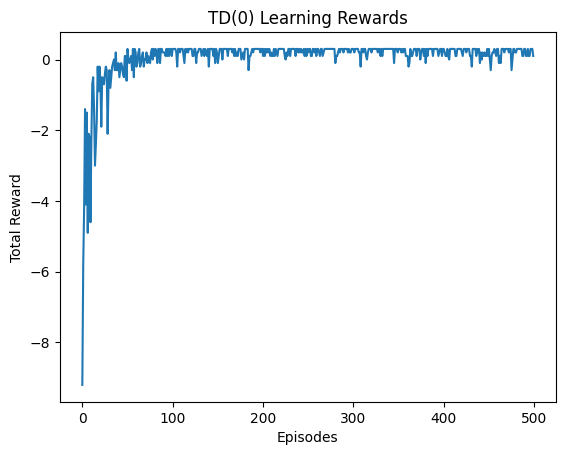

In [11]:
plt.plot(rewards)
plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('TD(0) Learning Rewards')
plt.show()

from the graph
* At the start, the agent receives significant negative rewards. This suggests that the agent was exploring inefficient or suboptimal paths in the early episodes, leading to more penalties for longer steps.
* Over the episodes, the total reward improves, which indicates that the agent is learning better policies to navigate the gridworld.
* After around 100–200 episodes, the rewards stabilize close to 0. This implies that the agent has mostly learned an optimal or near-optimal policy for navigating the environment with minimal penalties.

Test the trained agent

In [12]:
env.reset()
state = env.start
env.render()
done = False

while not done:
    action = agent.choose_action(state)
    state, _, done = env.step(action)
    env.render()

[[ 1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2.]]
[[ 0.  1.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2.]]
[[ 0.  0.  1.  0.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2.]]
[[ 0.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  1.  0.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  1.  0.]
 [ 0.  0. -1.  0.  0.]
 [ 0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  2.]]
[[ 0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  1.]
 [ 0.  0. -1.  0.  0.]
 [ 

The above matrices represent a step-by-step update of a gridworld environment
* Positive values like 1 and 2 likely represent a start state or a reward (goal).
* -1 represents obstacles or walls (inaccessible states).
* 0 represents regular grid cells where the agent can move.